## Collecting the Data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading the dataset
df = pd.read_csv("spam.csv",encoding="latin-1")
print("Dimensions:",df.shape)
df.head(5)

Dimensions: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Analysing Data

In [3]:
# Basic checks
print("Columns:", df.columns)
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Target distribution
print("\nLabel counts:\n", df['v1'].value_counts())


Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Null Values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Duplicate rows: 403

Label counts:
 v1
ham     4825
spam     747
Name: count, dtype: int64


## Data Wrangling

In [4]:
# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Remove duplicates
df = df.drop_duplicates()

# Handle missing text safely
df['text'] = df['text'].fillna("")

# Convert labels to numeric
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Optional: lowercase (consistency)
df['text'] = df['text'].str.lower()

print("After cleaning shape:", df.shape)
df.head()


After cleaning shape: (5169, 2)


,label,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## Train and Test Data

In [5]:
X = df['text']
y = df['label']

In [6]:
X.head(5)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 4135
Test size: 1034


## Vectorisation

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Training the model

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

## Predictions and Accuracy

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 96.42166344294004

Confusion Matrix:
 [[887   2]
 [ 35 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [11]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df.columns)

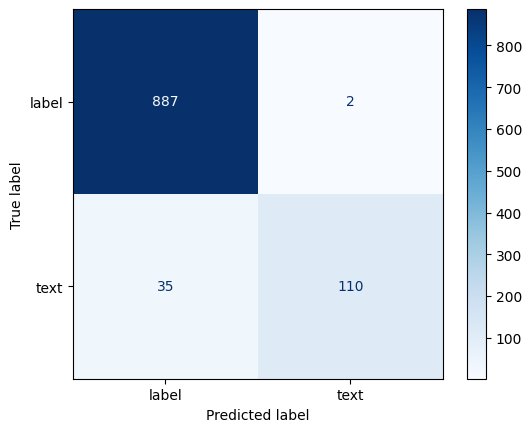

In [12]:
cm_display.plot(cmap=plt.cm.Blues)

In [13]:
def predict_message(message):
    message = message.lower()
    msg_vec = vectorizer.transform([message])
    pred = model.predict(msg_vec)[0]
    return "SPAM" if pred == 1 else "HAM"

print(predict_message("Congratulations! You won a free prize, click now!"))
print(predict_message("Hi How are you?"))


SPAM
HAM


In [14]:
import joblib

joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and Vectorizer saved successfully ✅")


Model and Vectorizer saved successfully ✅
